In [1]:
# standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# calling the database
data =pd.read_csv("EEG_Eye_State_Classification.csv")

In [3]:
data.shape

(14980, 15)

In [4]:
data.head()

AF3       F7       F3      FC5       T7       P7       O1       O2  \
0  4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
1  4324.62  4004.62  4293.85  4148.72  4342.05  4586.67  4097.44  4638.97   
2  4327.69  4006.67  4295.38  4156.41  4336.92  4583.59  4096.92  4630.26   
3  4328.72  4011.79  4296.41  4155.90  4343.59  4582.56  4097.44  4630.77   
4  4326.15  4011.79  4292.31  4151.28  4347.69  4586.67  4095.90  4627.69   

        P8       T8      FC6       F4       F8      AF4  eyeDetection  
0  4222.05  4238.46  4211.28  4280.51  4635.90  4393.85             0  
1  4210.77  4226.67  4207.69  4279.49  4632.82  4384.10             0  
2  4207.69  4222.05  4206.67  4282.05  4628.72  4389.23             0  
3  4217.44  4235.38  4210.77  4287.69  4632.31  4396.41             0  
4  4210.77  4244.10  4212.82  4288.21  4632.82  4398.46             0

In [5]:
data.describe()

AF3            F7            F3            FC5            T7  \
count   14980.000000  14980.000000  14980.000000   14980.000000  14980.000000   
mean     4321.917777   4009.767694   4264.022433    4164.946326   4341.741075   
std      2492.072174     45.941672     44.428052    5216.404632     34.738821   
min      1030.770000   2830.770000   1040.000000    2453.330000   2089.740000   
25%      4280.510000   3990.770000   4250.260000    4108.210000   4331.790000   
50%      4294.360000   4005.640000   4262.560000    4120.510000   4338.970000   
75%      4311.790000   4023.080000   4270.770000    4132.310000   4347.180000   
max    309231.000000   7804.620000   6880.510000  642564.000000   6474.360000   

                  P7             O1            O2             P8  \
count   14980.000000   14980.000000  14980.000000   14980.000000   
mean     4644.022379    4110.400160   4616.056904    4218.826610   
std      2924.789537    4600.926543     29.292603    2136.408523   
min      2768.210000    2086.150000   4567.180000    1357.950000   
25%      4611.790000    4057.950000   4604.620000    4190.770000   
50%      4617.950000    4070.260000   4613.330000    4199.490000   
75%      4626.670000    4083.590000   4624.100000    4209.230000   
max    362564.000000  567179.000000   7264.100000  265641.000000   

                 T8           FC6            F4             F8            AF4  \
count  14980.000000  14980.000000  14980.000000   14980.000000   14980.000000   
mean    4231.316200   4202.456900   4279.232774    4615.205336    4416.435832   
std       38.050903     37.785981     41.544312    1208.369958    5891.285043   
min     1816.410000   3273.330000   2257.950000      86.666700    1366.150000   
25%     4220.510000   4190.260000   4267.690000    4590.770000    4342.050000   
50%     4229.230000   4200.510000   4276.920000    4603.080000    4354.870000   
75%     4239.490000   4211.280000   4287.180000    4617.440000    4372.820000   
max     6674.360000   6823.080000   7002.560000  152308.000000  715897.000000   

       eyeDetection  
count  14980.000000  
mean       0.448798  
std        0.497388  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        1.000000

In [6]:
data.isna().sum()

AF3             0
F7              0
F3              0
FC5             0
T7              0
P7              0
O1              0
O2              0
P8              0
T8              0
FC6             0
F4              0
F8              0
AF4             0
eyeDetection    0
dtype: int64

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'EyeDetection Distributions \n (0: open || 1: closed)')

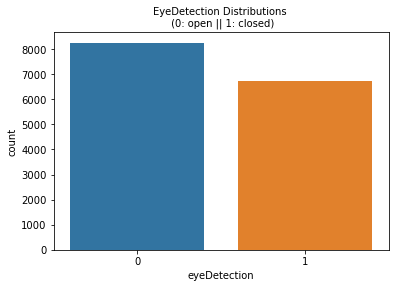

In [7]:
# Counting the number of individual instances in eyeDetection variable
sns.countplot('eyeDetection', data=data)
plt.title('EyeDetection Distributions \n (0: open || 1: closed)', fontsize=10)

In [9]:
# Creating box plot to find the extreme outliers in the columns (Okada, 2020)
import plotly.graph_objects as go

fig = go.Figure()
data_outlier_columns=['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6',
       'F4', 'F8', 'AF4']
for i in data_outlier_columns:
  fig.add_trace(go.Box(y=data[i].values, name=data[i].name))
  
fig.show()

In [7]:
df = data.copy()

In [8]:
# Applying capping on 7 variables with extreme outliers (KLEPPEN, 2023)
for i in ["AF3","FC5","P7","O1","P8","F8","AF4"]:
    upper_limit = df[i].mean() + 3*df[i].std()
    lower_limit = df[i].mean() - 3*df[i].std()
    df[i] = np.clip(df[i], lower_limit, upper_limit)
df.describe() 

AF3            F7            F3           FC5            T7  \
count  14980.000000  14980.000000  14980.000000  14980.000000  14980.000000   
mean    4302.062446   4009.767694   4264.022433   4123.374241   4341.741075   
std       84.271714     45.941672     44.428052    131.084934     34.738821   
min     1030.770000   2830.770000   1040.000000   2453.330000   2089.740000   
25%     4280.510000   3990.770000   4250.260000   4108.210000   4331.790000   
50%     4294.360000   4005.640000   4262.560000   4120.510000   4338.970000   
75%     4311.790000   4023.080000   4270.770000   4132.310000   4347.180000   
max    11798.134300   7804.620000   6880.510000  19814.160223   6474.360000   

                 P7            O1            O2            P8            T8  \
count  14980.000000  14980.000000  14980.000000  14980.000000  14980.000000   
mean    4620.714929   4073.733549   4616.056904   4201.803049   4231.316200   
std       81.053368    117.687854     29.292603     64.830058     38.050903   
min     2768.210000   2086.150000   4567.180000   1357.950000   1816.410000   
25%     4611.790000   4057.950000   4604.620000   4190.770000   4220.510000   
50%     4617.950000   4070.260000   4613.330000   4199.490000   4229.230000   
75%     4626.670000   4083.590000   4624.100000   4209.230000   4239.490000   
max    13418.390991  17913.179787   7264.100000  10628.052179   6674.360000   

                FC6            F4            F8           AF4  eyeDetection  
count  14980.000000  14980.000000  14980.000000  14980.000000  14980.000000  
mean    4202.456900   4279.232774   4605.695952   4363.515778      0.448798  
std       37.785981     41.544312     61.839348    209.930137      0.497388  
min     3273.330000   2257.950000    990.095461   1366.150000      0.000000  
25%     4190.260000   4267.690000   4590.770000   4342.050000      0.000000  
50%     4200.510000   4276.920000   4603.080000   4354.870000      0.000000  
75%     4211.280000   4287.180000   4617.440000   4372.820000      1.000000  
max     6823.080000   7002.560000   8240.315210  22090.290960      1.000000

In [9]:
df.corr()["eyeDetection"]

AF3             0.048132
F7             -0.079994
F3              0.038902
FC5            -0.013496
T7             -0.000369
P7             -0.023604
O1             -0.001249
O2              0.025100
P8              0.024546
T8              0.047218
FC6             0.064294
F4              0.047965
F8              0.082444
AF4             0.015611
eyeDetection    1.000000
Name: eyeDetection, dtype: float64

<AxesSubplot:title={'center':'Correlation of Features'}>

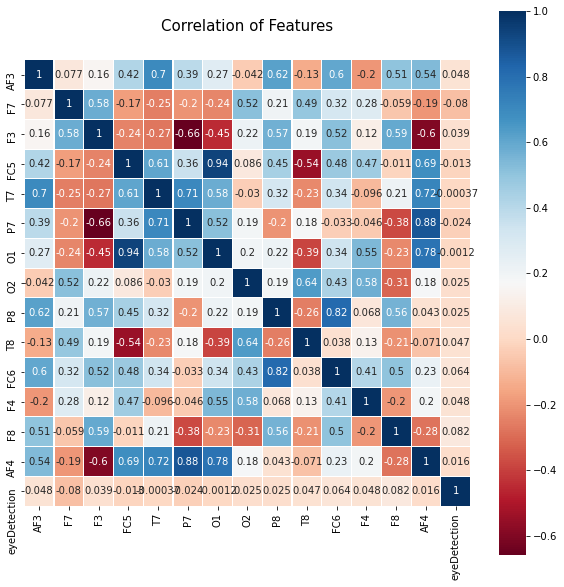

In [10]:
plt.figure(figsize=(10,10))
plt.title('Correlation of Features', y=1.05, size=15)
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=plt.cm.RdBu, linecolor='white', annot=True)

In [11]:
# Splitting dataset into train and test dataset and applying logistic regression
X_train, X_test, y_train, y_test = train_test_split(df.drop('eyeDetection', axis=1), df['eyeDetection'], test_size=0.2, random_state=22)

In [12]:
lr = LogisticRegression()

In [13]:
lr.fit(X_train, y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [14]:
predictions = lr.predict(X_test)

In [15]:
acc = accuracy_score(y_test, predictions)*100
print(acc)

61.61548731642189


In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[1238,  414],
       [ 736,  608]], dtype=int64)

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.63      0.75      0.68      1652
           1       0.59      0.45      0.51      1344

    accuracy                           0.62      2996
   macro avg       0.61      0.60      0.60      2996
weighted avg       0.61      0.62      0.61      2996



In [18]:
coeff_df = pd.DataFrame(df.columns.delete(14))

coeff_df.columns = ['Features']

coeff_df["Coefficient Estimate"] = pd.Series(lr.coef_[0])

coeff_df

Features  Coefficient Estimate
0       AF3              0.014428
1        F7             -0.020359
2        F3              0.016724
3       FC5             -0.011260
4        T7              0.015327
5        P7             -0.024470
6        O1              0.004110
7        O2              0.005553
8        P8              0.001681
9        T8              0.005166
10      FC6             -0.010526
11       F4              0.007519
12       F8             -0.002360
13      AF4             -0.001698

In [19]:
#stochastic gradient
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss="log", penalty="l2")
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
sgd.score(X_train, y_train)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
print(acc_sgd)

60.29


In [20]:
#batch gradient
sgd = SGDClassifier(loss="log", penalty="l2", max_iter=1000)
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
sgd.score(X_train, y_train)
acc_batch = round(sgd.score(X_train, y_train) * 100, 2)
print(acc_batch)

45.34


In [21]:
#Stochastic Gradient With a different learning rate
sgd = SGDClassifier(loss="log", penalty="l2", learning_rate='optimal')
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
sgd.score(X_train, y_train)
acc_sgd_lr = round(sgd.score(X_train, y_train) * 100, 2)
print(acc_sgd_lr)

57.08


In [22]:
# Batch gradient descent with a different learning rate
sgd = SGDClassifier(loss="log", penalty="l2", learning_rate='optimal', max_iter=1000)
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
sgd.score(X_train, y_train)
acc_batch_lr = round(sgd.score(X_train, y_train) * 100, 2)
print(acc_batch_lr)

61.12


In [23]:
#Stochastic Gradient with a different learning rate and l1 penalty

sgd = SGDClassifier(loss="log", penalty="l1", learning_rate='optimal')
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
sgd.score(X_train, y_train)
acc_sgd_lr_l1 = round(sgd.score(X_train, y_train) * 100, 2)
print(acc_sgd_lr_l1)

60.05


In [24]:
#Batch Gradient with a different learning rate and l1 penalty

sgd = SGDClassifier(loss="log", penalty="l1", learning_rate='optimal', max_iter=1000)
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
sgd.score(X_train, y_train)
acc_batch_lr_l1 = round(sgd.score(X_train, y_train) * 100, 2)
print(acc_batch_lr_l1)

61.9


In [25]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Stochastic Gradient Descent', 'Batch Gradient Descent', 'Stochastic Gradient Descent with optimal learning rate & l2 penalty', 'Batch Gradient Descent with optimal learning rate & l2 penalty', 'Stochastic Gradient Descent with optimal learning rate and l1 penalty', 'Batch GD with optimal learning rate and l1 penalty'],
    'Score': [accuracy_score(y_test, predictions)*100, acc_sgd, acc_batch, acc_sgd_lr, acc_batch_lr, acc_sgd_lr_l1, acc_batch_lr_l1],
    'Abbreviation' : ['acc', 'acc_sgd','acc_batch','acc_sgd_lr', 'acc_batch_lr','acc_sgd_lr_l1', 'acc_batch_lr_l1']})
models.sort_values(by='Score', ascending=False)

Model      Score  \
6  Batch GD with optimal learning rate and l1 pen...  61.900000   
0                                Logistic Regression  61.615487   
4  Batch Gradient Descent with optimal learning r...  61.120000   
1                        Stochastic Gradient Descent  60.290000   
5  Stochastic Gradient Descent with optimal learn...  60.050000   
3  Stochastic Gradient Descent with optimal learn...  57.080000   
2                             Batch Gradient Descent  45.340000   

      Abbreviation  
6  acc_batch_lr_l1  
0              acc  
4     acc_batch_lr  
1          acc_sgd  
5    acc_sgd_lr_l1  
3       acc_sgd_lr  
2        acc_batch

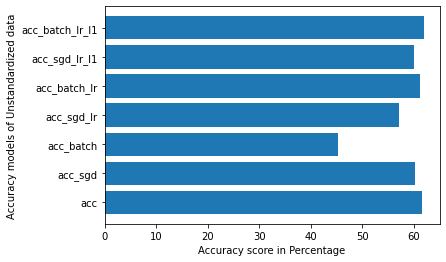

In [26]:
plt.barh(models["Abbreviation"], models["Score"])
plt.xlabel("Accuracy score in Percentage")
plt.ylabel("Accuracy models of Unstandardized data")
plt.show()

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
X_test

array([[-1.50301567, -0.90129257, -1.16990031, ..., -1.23696823,
        -1.34664823, -0.42310156],
       [-1.17124294, -0.67284274, -0.81773537, ..., -0.59373848,
        -0.74941411, -0.31126309],
       [-0.55735824,  0.38222637,  0.04455955, ..., -0.51942686,
        -1.57512839, -0.28273679],
       ...,
       [ 0.96077296,  0.62149415,  1.23486284, ...,  1.08913006,
         1.14779333,  0.24142853],
       [-1.12142041, -0.71632669, -0.70832031, ..., -0.79158108,
        -0.951518  , -0.31344426],
       [ 1.08516752,  0.89342792,  1.64765604, ...,  1.28697267,
         1.27076841,  0.28748973]])

In [29]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [30]:
predictions = lr.predict(X_test)

In [31]:
acc = accuracy_score(y_test, predictions)*100
print(acc)

63.65153538050734


In [32]:
confusion_matrix(y_test, predictions)

array([[1277,  375],
       [ 714,  630]], dtype=int64)

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.64      0.77      0.70      1652
           1       0.63      0.47      0.54      1344

    accuracy                           0.64      2996
   macro avg       0.63      0.62      0.62      2996
weighted avg       0.63      0.64      0.63      2996



In [34]:
coeff_df = pd.DataFrame(df.columns.delete(14))

coeff_df.columns = ['Features']

coeff_df["Coefficient Estimate"] = pd.Series(lr.coef_[0])

coeff_df

Features  Coefficient Estimate
0       AF3              0.425705
1        F7             -0.947669
2        F3              0.559082
3       FC5             -1.414451
4        T7              1.337942
5        P7             -3.606858
6        O1              0.588504
7        O2              0.009647
8        P8              0.225677
9        T8              0.189487
10      FC6             -0.331996
11       F4              0.258705
12       F8             -0.092826
13      AF4              1.179300

In [35]:
#stochastic gradient
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss="log", penalty="l2")
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
sgd.score(X_train, y_train)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
print(acc_sgd)

63.78


In [36]:
#batch gradient
sgd = SGDClassifier(loss="log", penalty="l2", max_iter=1000)
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
sgd.score(X_train, y_train)
acc_batch = round(sgd.score(X_train, y_train) * 100, 2)
print(acc_batch)

63.4


In [37]:
#Stochastic Gradient with a different learning rate
sgd = SGDClassifier(loss="log", penalty="l2", learning_rate='optimal')
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
sgd.score(X_train, y_train)
acc_sgd_lr = round(sgd.score(X_train, y_train) * 100, 2)
print(acc_sgd_lr)

63.89


In [38]:
# Batch gradient descent with a different learning rate
sgd = SGDClassifier(loss="log", penalty="l2", learning_rate='optimal', max_iter=1000)
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
sgd.score(X_train, y_train)
acc_batch_lr = round(sgd.score(X_train, y_train) * 100, 2)
print(acc_batch_lr)

64.2


In [39]:
#Stochastic Gradient with a different learning rate and l1 penalty
sgd = SGDClassifier(loss="log", penalty="l1", learning_rate='optimal')
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
sgd.score(X_train, y_train)
acc_sgd_lr_l1 = round(sgd.score(X_train, y_train) * 100, 2)
print(acc_sgd_lr_l1)

63.18


In [40]:
# Batch Gradient with a different learning rate and l1 penalty

sgd = SGDClassifier(loss="log", penalty="l1", learning_rate='optimal', max_iter=1000)
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
sgd.score(X_train, y_train)
acc_batch_lr_l1 = round(sgd.score(X_train, y_train) * 100, 2)
print(acc_batch_lr_l1)

61.98


In [41]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Stochastic Gradient Descent', 'Batch Gradient Descent', 'Stochastic Gradient Descent with optimal learning rate & l2 penalty', 'Batch Gradient Descent with optimal learning rate & l2 penalty', 'Stochastic Gradient Descent with optimal learning rate and l1 penalty', 'Batch GD with optimal learning rate and l1 penalty'],
    'Score': [accuracy_score(y_test, predictions)*100, acc_sgd, acc_batch, acc_sgd_lr, acc_batch_lr, acc_sgd_lr_l1, acc_batch_lr_l1],
    'Abbreviation' : ['acc', 'acc_sgd','acc_batch','acc_sgd_lr', 'acc_batch_lr','acc_sgd_lr_l1', 'acc_batch_lr_l1']})
models.sort_values(by='Score', ascending=False)

Model      Score  \
4  Batch Gradient Descent with optimal learning r...  64.200000   
3  Stochastic Gradient Descent with optimal learn...  63.890000   
1                        Stochastic Gradient Descent  63.780000   
0                                Logistic Regression  63.651535   
2                             Batch Gradient Descent  63.400000   
5  Stochastic Gradient Descent with optimal learn...  63.180000   
6  Batch GD with optimal learning rate and l1 pen...  61.980000   

      Abbreviation  
4     acc_batch_lr  
3       acc_sgd_lr  
1          acc_sgd  
0              acc  
2        acc_batch  
5    acc_sgd_lr_l1  
6  acc_batch_lr_l1

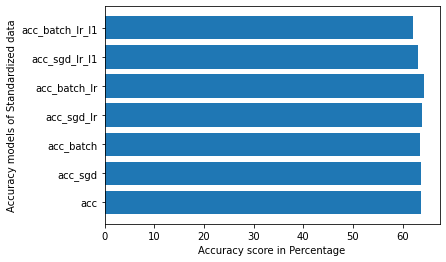

In [42]:
plt.barh(models["Abbreviation"], models["Score"])
plt.xlabel("Accuracy score in Percentage")
plt.ylabel("Accuracy models of Standardized data")
plt.show()

References:
1. KLEPPEN, E. 2023. How to FInd Outliers in Data Using Python [Online]. Available: https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/ [Accessed 1-March 2023].
2. OKADA, S. 2020. Available: https://towardsdatascience.com/how-to-create-an-interactive-dropdown-in-jupyter-322277f58a68 [Accessed 02-March 2023].